In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv
/kaggle/input/flood-prediction-factors/flood.csv


# Input the dataset

Import original dataset

In [2]:
original= pd.read_csv('/kaggle/input/flood-prediction-factors/flood.csv')
original

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515


In [3]:
path = '/kaggle/input/playground-series-s4e5/'
train = pd.read_csv(path + 'train.csv',index_col = ['id'])
test = pd.read_csv(path + 'test.csv',index_col = ['id'])

In [4]:
train

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,3,3,4,10,4,5,5,7,10,4,...,7,8,7,2,2,1,4,6,4,0.495
1117953,2,2,4,3,9,5,8,1,3,5,...,9,4,4,3,7,4,9,4,5,0.480
1117954,7,3,9,4,6,5,9,1,3,4,...,5,5,5,5,6,5,5,2,4,0.485


In [5]:
test

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
id,,,,,,,,,,,,,,,,,,,,
1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863257,5,4,8,3,5,4,4,5,5,5,5,6,1,3,5,6,4,4,6,6
1863258,4,4,2,12,4,3,4,3,5,5,3,7,4,4,3,5,5,3,5,4
1863259,5,7,9,5,5,6,7,5,5,3,6,11,3,11,4,5,9,5,5,4


# Check missing values and duplicate values:

In [6]:
full_train = pd.concat([original,train])
full_train.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [7]:
test.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [8]:
full_train.duplicated().sum()

0

In [9]:
test.duplicated().sum()

0

# Define X,y then get overview insight:

In [10]:
X = train.drop('FloodProbability',axis=1)
y = train[['FloodProbability']]

# Features distribution:

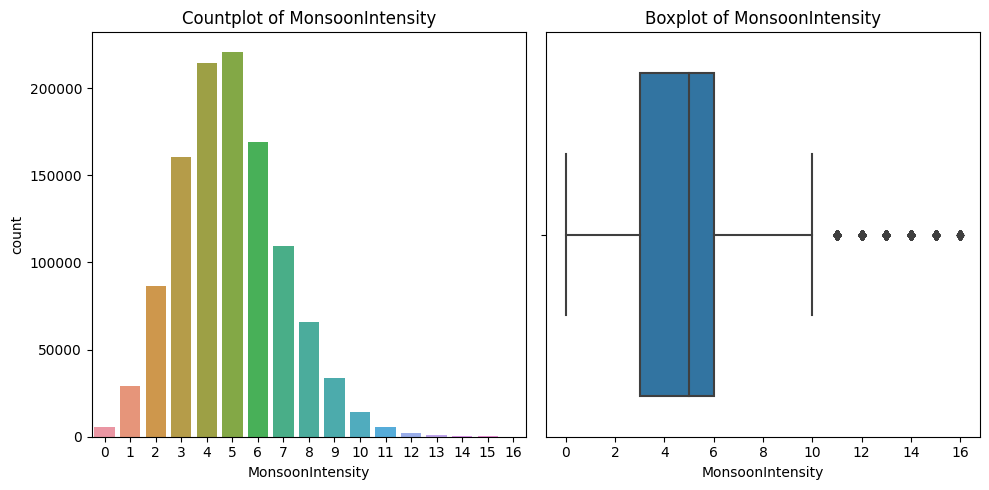

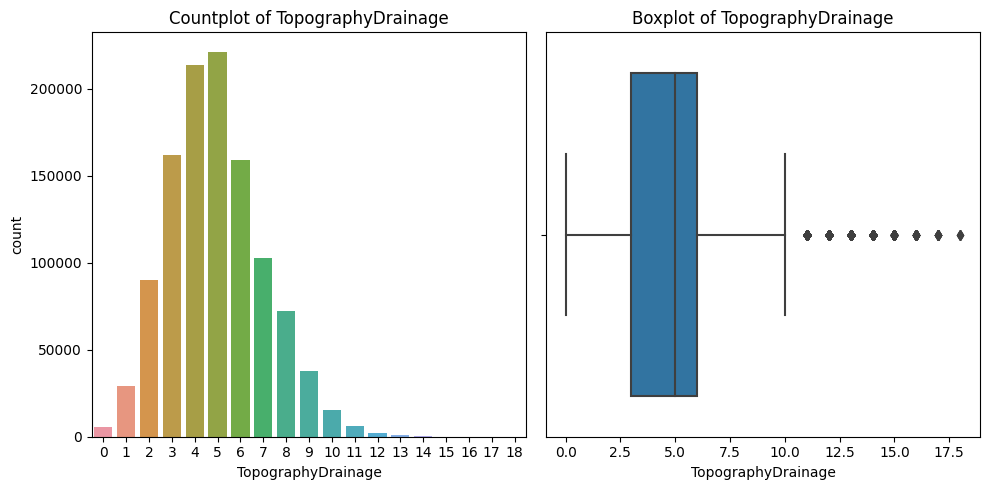

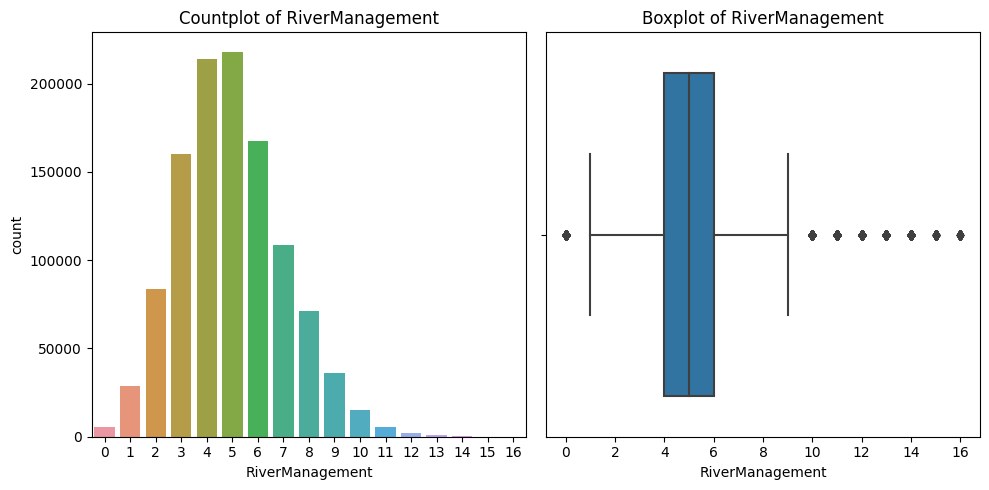

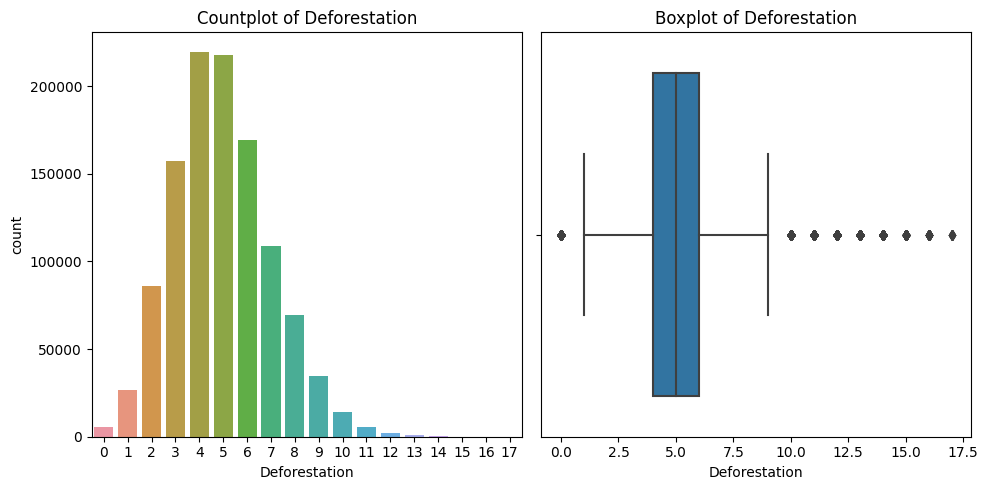

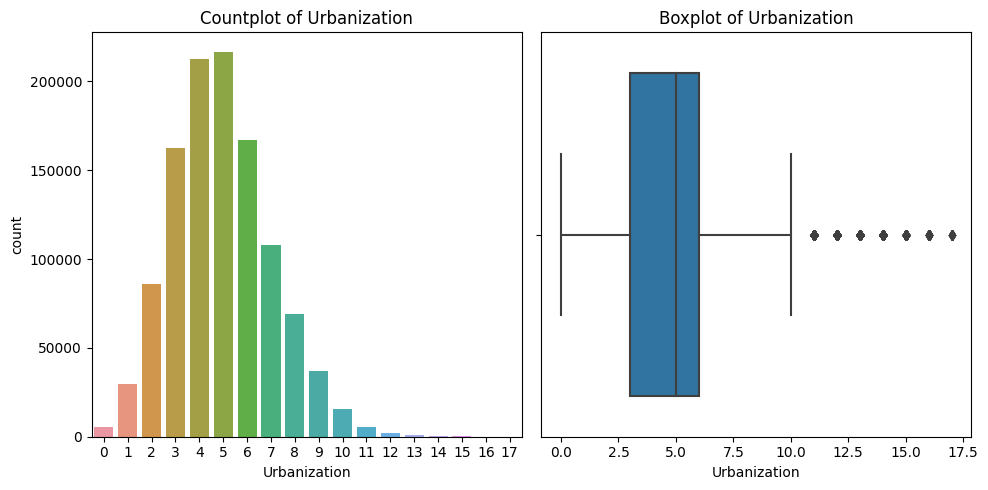

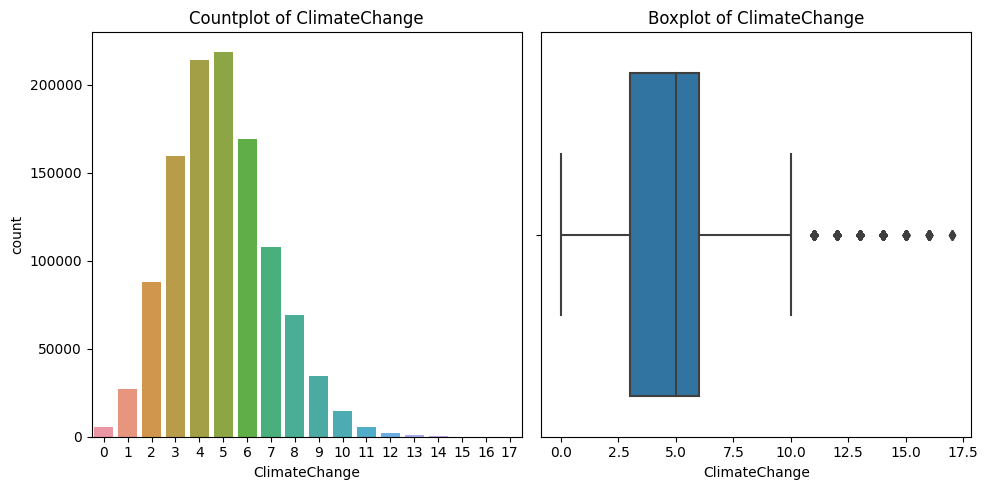

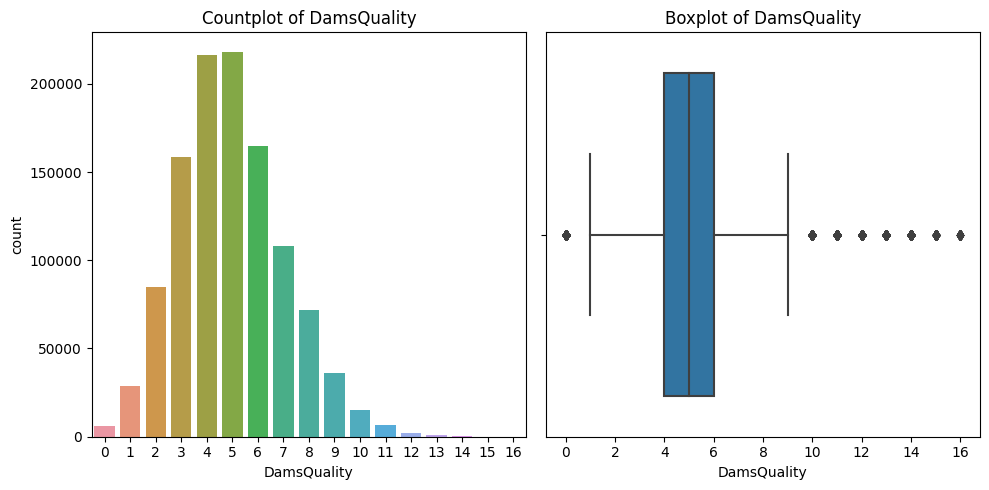

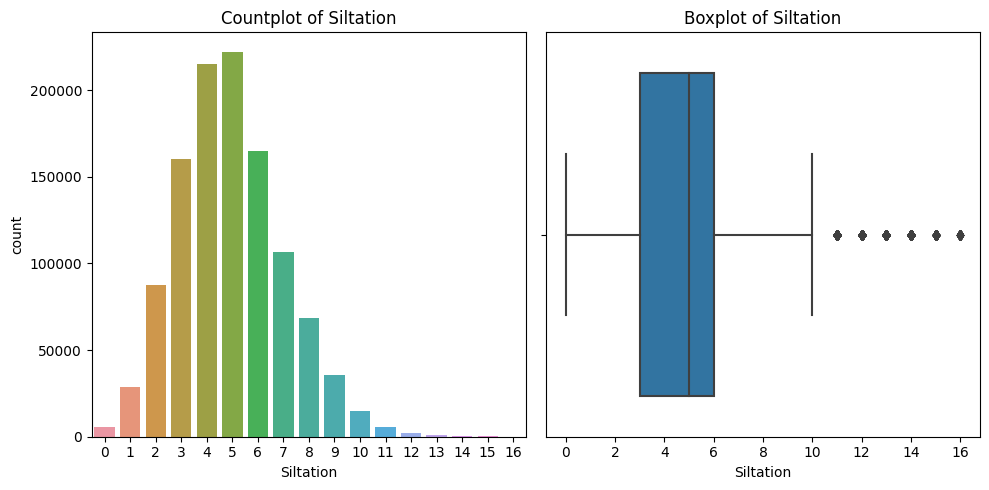

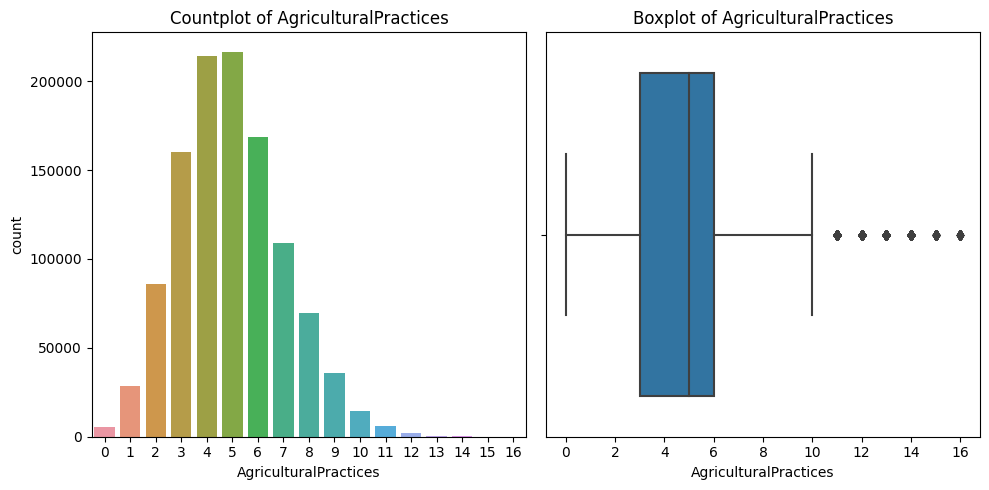

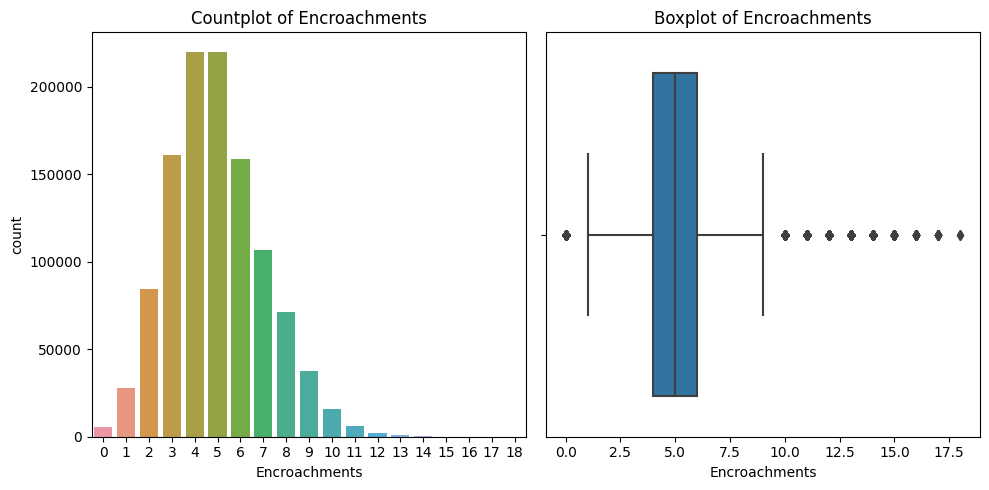

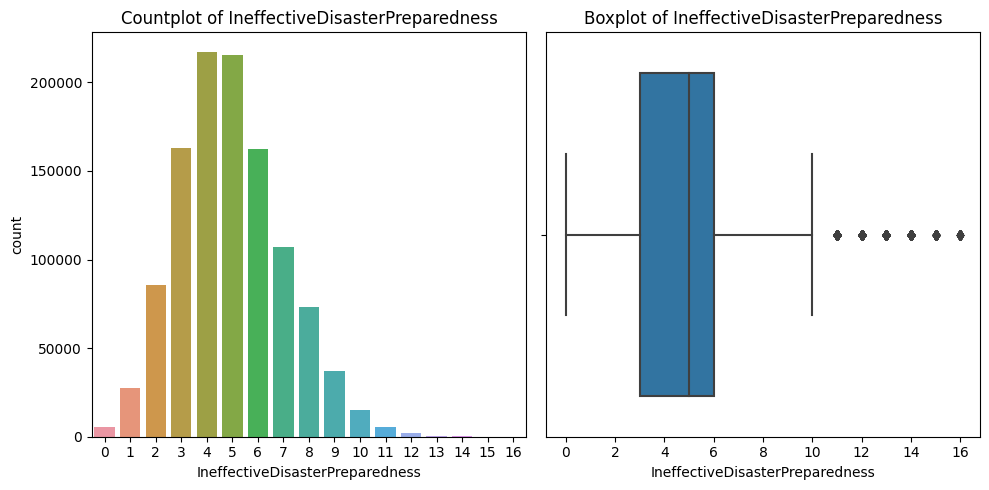

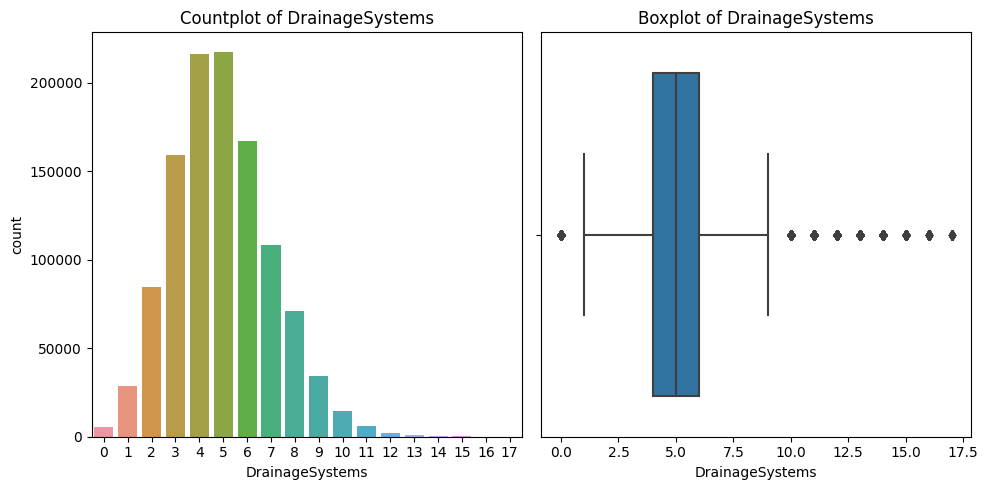

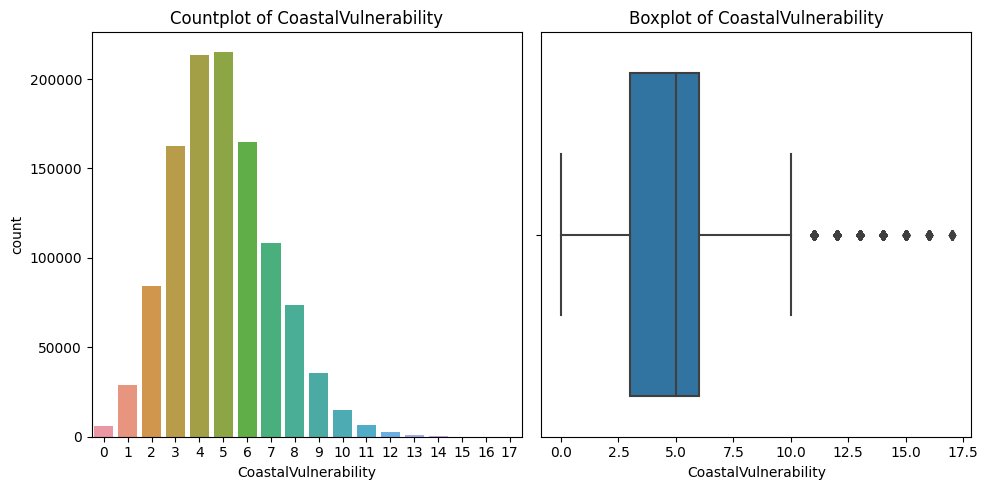

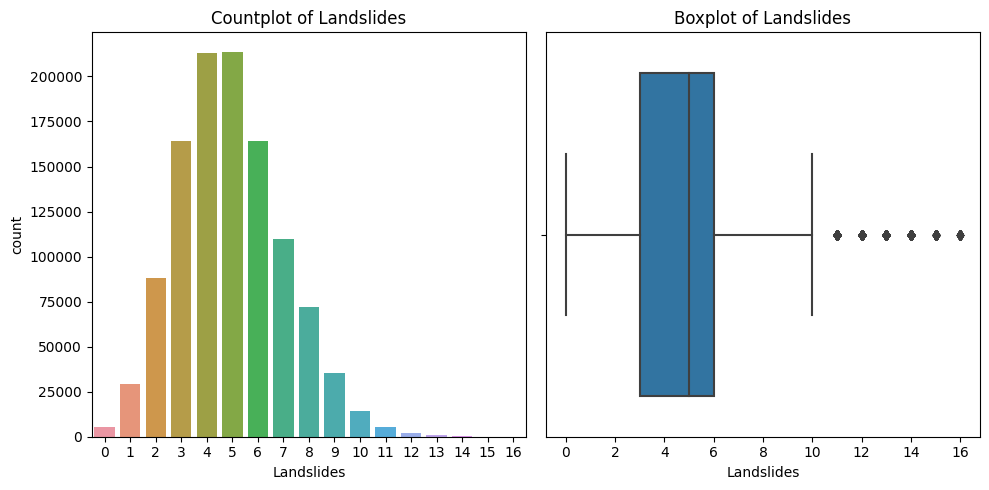

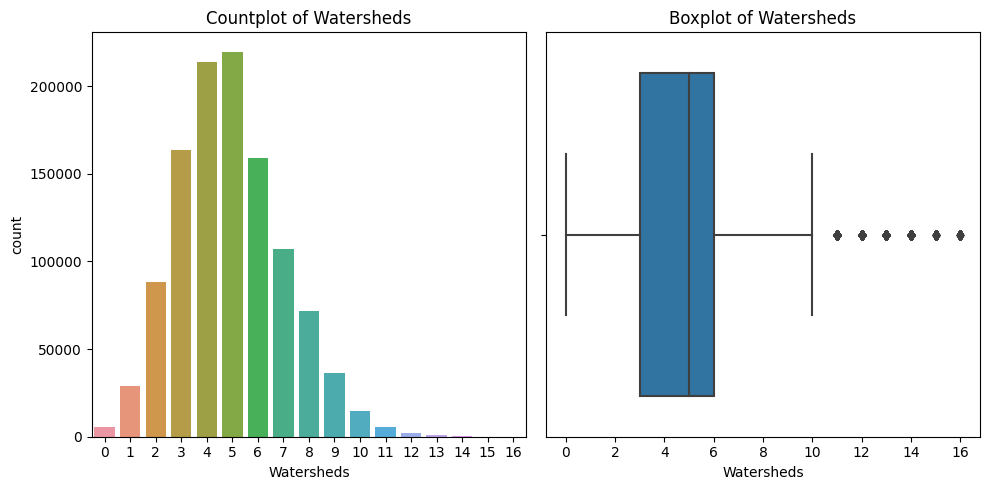

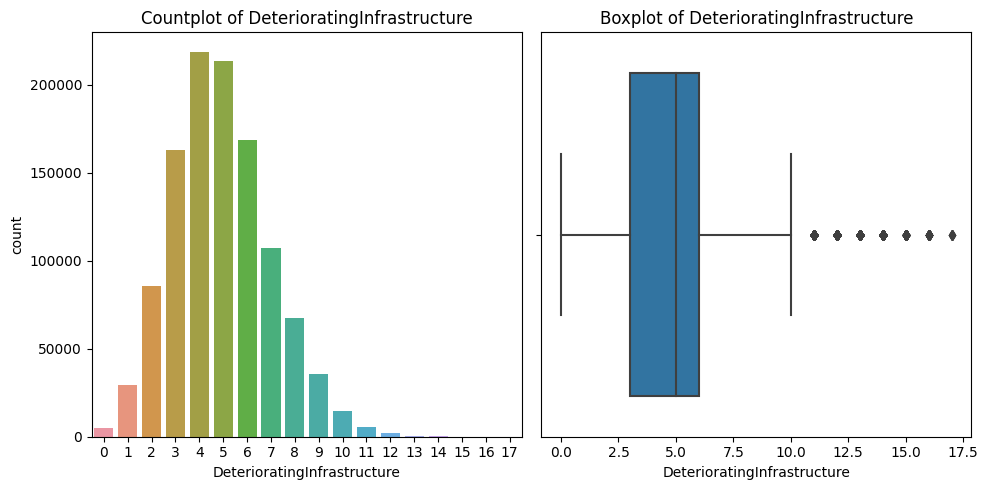

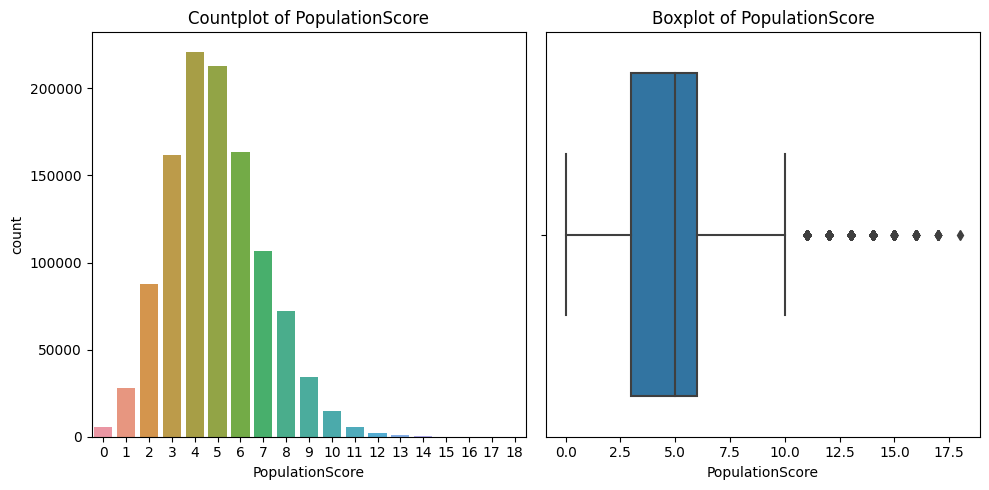

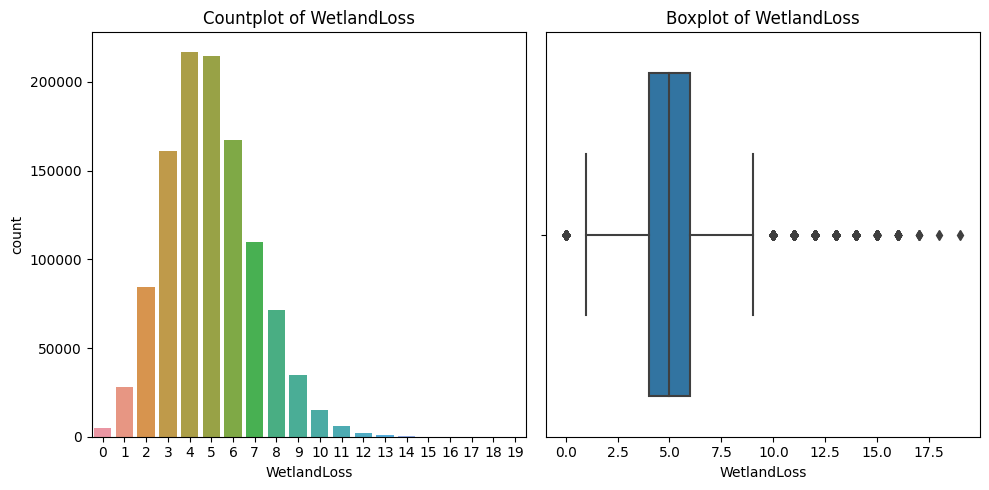

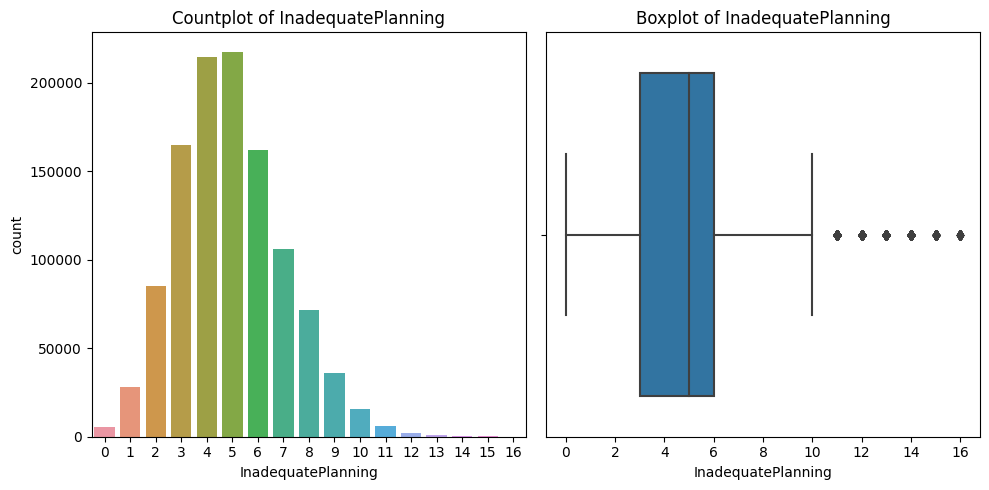

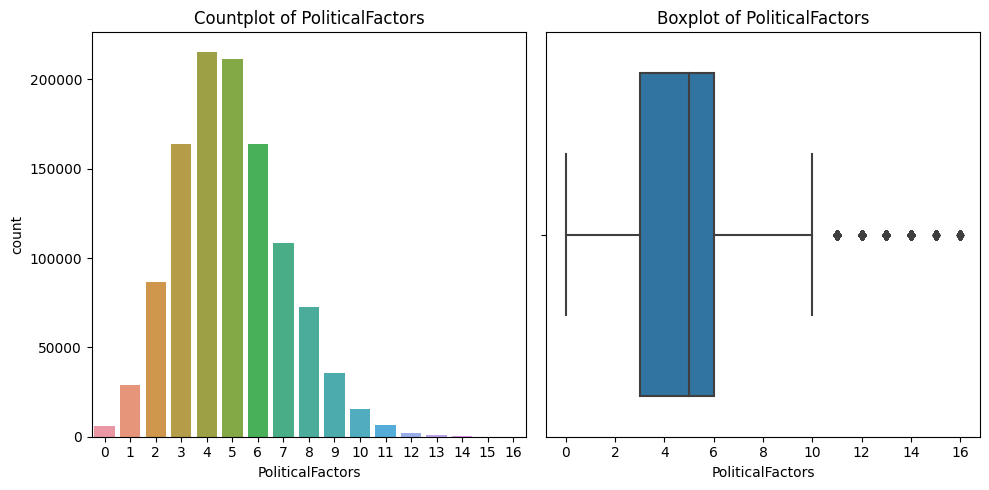

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
for column in X.columns:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Countplot
    sns.countplot(x=column, data=X, ax=axs[0])
    axs[0].set_title(f'Countplot of {column}')

    # Boxplot
    sns.boxplot(x=column, data=X, ax=axs[1])
    axs[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

All columns have right skewed distribution and not much outliers

In [12]:
len(X.columns)

20

In [13]:
X.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

X have 20 columns.

1. Natural Factors:
* MonsoonIntensity
* TopographyDrainage
* ClimateChange
* CoastalVulnerability 
* Landslides
* Watersheds
* WetlandLoss

2. Human Factors:
* Deforestation
* Urbanization
* DamsQuality
* Siltation
* AgriculturalPractices 
* Encroachments

3. Management Factors:
* InadequatePlanning
* DeterioratingInfrastructure
* PoliticalFactors
* PopulationScore
* DrainageSystems 
* RiverManagement
* IneffectiveDisasterPreparedness

In [14]:
X.skew()

MonsoonIntensity                   0.444528
TopographyDrainage                 0.458728
RiverManagement                    0.426491
Deforestation                      0.434314
Urbanization                       0.442168
ClimateChange                      0.429403
DamsQuality                        0.441402
Siltation                          0.449248
AgriculturalPractices              0.421145
Encroachments                      0.463551
IneffectiveDisasterPreparedness    0.443369
DrainageSystems                    0.441420
CoastalVulnerability               0.439917
Landslides                         0.425099
Watersheds                         0.450488
DeterioratingInfrastructure        0.444167
PopulationScore                    0.451415
WetlandLoss                        0.437045
InadequatePlanning                 0.455136
PoliticalFactors                   0.437561
dtype: float64

In [15]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.0,3.0,5.0,6.0,16.0
TopographyDrainage,1117957.0,4.926671,2.093879,0.0,3.0,5.0,6.0,18.0
RiverManagement,1117957.0,4.955322,2.072186,0.0,4.0,5.0,6.0,16.0
Deforestation,1117957.0,4.942240,2.051689,0.0,4.0,5.0,6.0,17.0
Urbanization,1117957.0,4.942517,2.083391,0.0,3.0,5.0,6.0,17.0
ClimateChange,1117957.0,4.934093,2.057742,0.0,3.0,5.0,6.0,17.0
DamsQuality,1117957.0,4.955878,2.083063,0.0,4.0,5.0,6.0,16.0
Siltation,1117957.0,4.927791,2.065992,0.0,3.0,5.0,6.0,16.0
AgriculturalPractices,1117957.0,4.942619,2.068545,0.0,3.0,5.0,6.0,16.0
Encroachments,1117957.0,4.949230,2.083324,0.0,4.0,5.0,6.0,18.0


# Target distribution:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FloodProbability', ylabel='Density'>

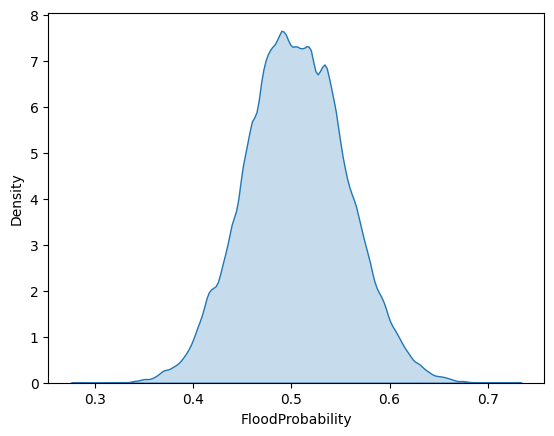

In [16]:
sns.kdeplot(x='FloodProbability',data=y,fill=True)

while the target column have the normal distribution.

In [17]:
y.skew()

FloodProbability    0.047226
dtype: float64

# Correlation on features:

In [18]:
X.corr()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
MonsoonIntensity,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,-0.010309,-0.008032,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474
TopographyDrainage,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,-0.012887,-0.010746,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350
RiverManagement,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,-0.011615,-0.010675,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550
Deforestation,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,-0.013175,-0.009512,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661
Urbanization,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,-0.010784,-0.012685,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005
ClimateChange,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,-0.012533,-0.011346,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379
DamsQuality,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,-0.010890,-0.009515,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081
Siltation,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,-0.010628,-0.009099,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493
AgriculturalPractices,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,-0.012244,-0.010763,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157
Encroachments,-0.010309,-0.012887,-0.011615,-0.013175,-0.010784,-0.012533,-0.010890,-0.010628,-0.012244,1.000000,-0.012211,-0.011994,-0.016203,-0.011299,-0.013542,-0.010404,-0.010645,-0.010364,-0.012175,-0.011860


<Axes: >

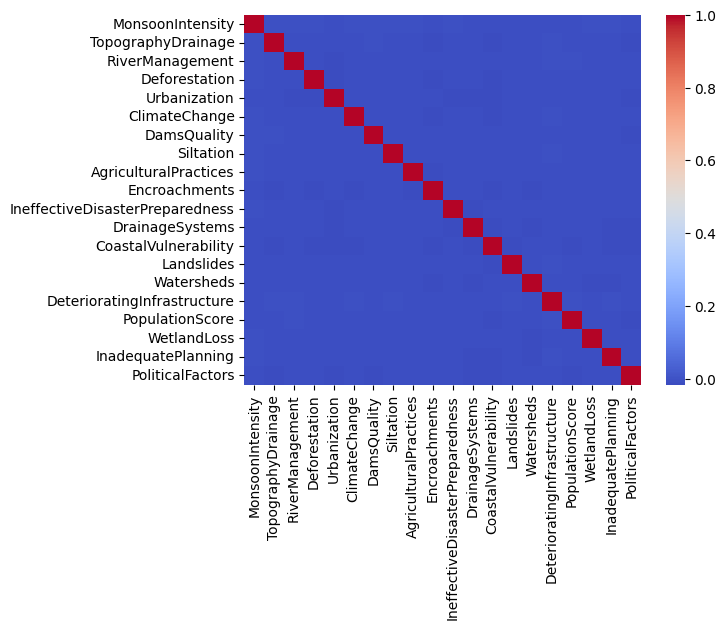

In [19]:
sns.heatmap(X.corr(),cmap='coolwarm')

> This can help identify multicollinearity issues, where two or more variables are highly correlated, which can affect the performance of certain models, especially linear models like linear regression.
> 
> Once you've assessed the correlations, if you find high correlations among several features, you might consider using Principal Component Analysis (PCA)

> High Feature Correlation: If the correlation matrix reveals significant correlations (absolute values > 0.7 or < -0.7) between many features, PCA can help reduce dimensionality by capturing the variance in these correlated features into a smaller set of uncorrelated components. This can improve the performance of machine learning models that struggle with highly correlated features.

# Data modelling:

1. Train test split
1. PowerTransformer
1. Scaling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 512)

In [21]:
pt = PowerTransformer(method='yeo-johnson')
X_train_power = pt.fit_transform(X_train)
X_test_power = pt.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_power)
X_test_scaled = scaler.transform(X_test_power)

# Linear Regression:

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression(positive= False, fit_intercept= True)

lr.fit(X_train_scaled,y_train)
cv_lr = cross_val_score(lr,X_train_scaled,y_train,cv=10,scoring = 'r2')
cv_lr

array([0.83345528, 0.83172795, 0.83223845, 0.83414903, 0.83313656,
       0.83166495, 0.83049001, 0.83415328, 0.83239647, 0.83309591])

# Decision Tree Regressor:

# Support Vector Machine:

In [23]:
# from sklearn.svm import SVR
# svr = SVR()
# svr.fit(X_train_scaled,np.ravel(y_train))
# cv_svr = cross_val_score(svr,X_train_scaled,np.ravel(y_train),cv=10,scoring='r2')

# Grid Search for SVR with C and gamma:

In [24]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# # Define the parameter grid
# param_grid = {'C': [0.1, 1, 10], 'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1]}

# # Create the SVR model
# svr = SVR()

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(svr, param_grid, cv=5)
# grid_search.fit(X_train_scaled,np.ravel(y_train))

# # Print the best parameters found
# print("Best Parameters SVR:", grid_search.best_params_)
# # grid_search.best_params_

# SGDRegressor:

Best Parameters SGD: {'alpha': 0.001, 'loss': 'huber'}

In [25]:
# from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score

sgd = SGDRegressor(alpha = 0.001,loss = 'huber')

# Instantiate the GridSearchCV object and run the search
# parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
#              'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}
# searcher = GridSearchCV(sgd, parameters, cv=10)
sgd.fit(X_train_scaled,np.ravel(y_train))
# cv_sgd = cross_val_score(sgd,X_train_scaled,np.ravel(y_train),cv=10,scoring='r2')

# cv_sgd

SGDRegressor(alpha=0.001, loss='huber')

# Ensemble Gradient Boosting Machines (GBM):

In [26]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Initialize the Gradient Boosting Regressor
# gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=512)

# # Train the model
# gbr.fit(X_train_scaled,np.ravel(y_train))

# XGBoost:

In [27]:
# submit = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')
# test_pt = pt.transform(test)
# test_scale = scaler.transform(test_pt)

# test_scale

In [28]:
# import xgboost as xgb

# dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
# dtest = xgb.DMatrix(X_test_scaled, label=y_test)
# check = xgb.DMatrix(test_scale)

# # Define parameters
# params = {
#     'objective': 'reg:squarederror',  # Regression task
#     'eval_metric': 'rmse',            # Root Mean Squared Error
#     'eta': 0.1,                       # Learning rate
#     'max_depth': 6,                   # Maximum depth of a tree
#     'subsample': 0.8,                 # Subsample ratio of the training instances
#     'colsample_bytree': 0.8           # Subsample ratio of columns when constructing each tree
# }

# # Train the model
# num_boost_round = 1000
# early_stopping_rounds = 10
# watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# xgb = xgb.train(params, dtrain, num_boost_round=num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds)
# # xgb_predict = xgb.predict(check)
# # xgb_predict

In [29]:
# import xgboost as xgb

# xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
# xgb.fit(X_train_scaled,np.ravel(y_train))

# Catboost:

In [30]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(iterations=1000,  # number of trees to build
                          learning_rate=0.1,  # learning rate
                          depth=6)

cat.fit(X_train_scaled,np.ravel(y_train), verbose=100) 

0:	learn: 0.0502969	total: 195ms	remaining: 3m 14s
100:	learn: 0.0247736	total: 10.3s	remaining: 1m 31s
200:	learn: 0.0210371	total: 18.7s	remaining: 1m 14s
300:	learn: 0.0202596	total: 26.7s	remaining: 1m 1s
400:	learn: 0.0200544	total: 34.5s	remaining: 51.5s
500:	learn: 0.0199846	total: 42.7s	remaining: 42.5s
600:	learn: 0.0199477	total: 50.4s	remaining: 33.5s
700:	learn: 0.0199212	total: 58.1s	remaining: 24.8s
800:	learn: 0.0198978	total: 1m 6s	remaining: 16.4s
900:	learn: 0.0198741	total: 1m 14s	remaining: 8.21s
999:	learn: 0.0198491	total: 1m 23s	remaining: 0us


# LightGBM:

In [31]:
# import lightgbm as lgb

# # Define model parameters (optional, adjust as needed)
# params = {
#     "objective": "regression",  # Set objective for regression
#     "metric": "l2",  # Evaluation metric (l2 for mean squared error)
#     "learning_rate": 0.1,  # Learning rate
#     "num_leaves": 31,  # Number of leaves in trees
#     "min_data_in_leaf": 20,  # Minimum data in a leaf
# }

# # Train the LightGBM model
# lgb = lgb.LGBMRegressor(**params)
# lgb.fit(X_train_scaled,np.ravel(y_train))

# Voting Regressor:
Combine 3 models: Linear Regression, SGD, vs Catboost

In [32]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor(estimators=[('LR', lr),('SGD', sgd),('catboost', cat)])
voting.fit(X_train_scaled,np.ravel(y_train))

0:	learn: 0.0502969	total: 138ms	remaining: 2m 17s
1:	learn: 0.0495812	total: 262ms	remaining: 2m 10s
2:	learn: 0.0488612	total: 385ms	remaining: 2m 7s
3:	learn: 0.0482043	total: 502ms	remaining: 2m 4s
4:	learn: 0.0475611	total: 616ms	remaining: 2m 2s
5:	learn: 0.0469380	total: 727ms	remaining: 2m
6:	learn: 0.0463325	total: 847ms	remaining: 2m
7:	learn: 0.0457675	total: 964ms	remaining: 1m 59s
8:	learn: 0.0451938	total: 1.09s	remaining: 1m 59s
9:	learn: 0.0446259	total: 1.21s	remaining: 1m 59s
10:	learn: 0.0441233	total: 1.31s	remaining: 1m 58s
11:	learn: 0.0436160	total: 1.42s	remaining: 1m 57s
12:	learn: 0.0431352	total: 1.53s	remaining: 1m 55s
13:	learn: 0.0426489	total: 1.63s	remaining: 1m 54s
14:	learn: 0.0421807	total: 1.74s	remaining: 1m 54s
15:	learn: 0.0417155	total: 1.84s	remaining: 1m 53s
16:	learn: 0.0412575	total: 1.94s	remaining: 1m 52s
17:	learn: 0.0408383	total: 2.05s	remaining: 1m 51s
18:	learn: 0.0404229	total: 2.15s	remaining: 1m 51s
19:	learn: 0.0400138	total: 2.26s

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('SGD', SGDRegressor(alpha=0.001, loss='huber')),
                            ('catboost',
                             <catboost.core.CatBoostRegressor object at 0x7acfabebf070>)])

# Predict the test set - Calculate R2 score:

In [33]:
# compare = pd.DataFrame(cv_lr,columns = ['Linear_Regression'])
# compare['SVR'] = cv_svr
# compare['SGD'] = cv_sgd
# compare.plot(kind='box')

In [34]:
from sklearn.metrics import r2_score
r2 = pd.DataFrame()

r2['LR'] = [r2_score(y_test,lr.predict(X_test_scaled))]
r2['SGD'] = [r2_score(y_test,sgd.predict(X_test_scaled))]
# r2['GBR'] = [r2_score(y_test,gbr.predict(X_test_scaled))]
# r2['XGB'] = [r2_score(y_test,xgb.predict(X_test_scaled))]
r2['CAT'] = [r2_score(y_test,cat.predict(X_test_scaled))]
# r2['LightLGB'] = [r2_score(y_test,lgb.predict(X_test_scaled))]
r2['Voting'] = [r2_score(y_test,voting.predict(X_test_scaled))]

r2

,LR,SGD,CAT,Voting
0,0.832055,0.831596,0.845746,0.839572


# Create the submission file:

In [35]:
submit = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')
test_pt = pt.transform(test)
test_scale = scaler.transform(test_pt)

submit['FloodProbability'] = voting.predict(test_scale)
submit.to_csv('submission.csv', index=False)

In [36]:
submit

,id,FloodProbability
0,1117957,0.576928
1,1117958,0.457059
2,1117959,0.452406
3,1117960,0.470561
4,1117961,0.470566
...,...,...
745300,1863257,0.482565
745301,1863258,0.452433
745302,1863259,0.622190
745303,1863260,0.551230
